In [14]:
import matplotlib.pyplot as plt
import numpy as np
source_color = '#ffc7cf'
target_color = '#91cbf2'

- Probability by Question Type of Data

Sum: 1.0


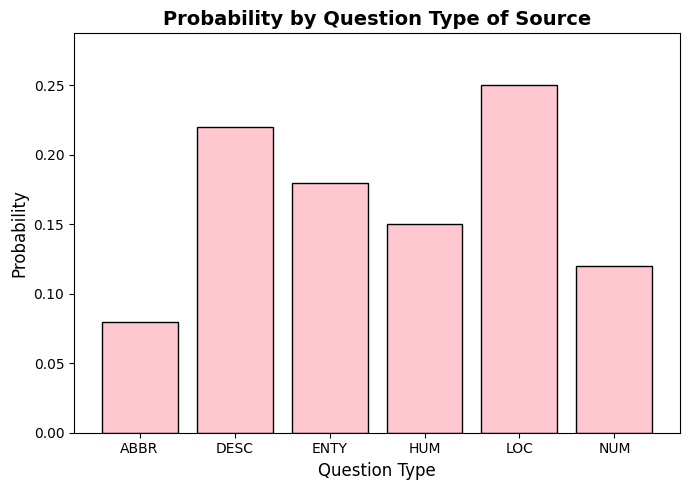

In [29]:
# Graph Config
question_types = ['ABBR', 'DESC', 'ENTY', 'HUM', 'LOC', 'NUM']
probabilities = np.array([0.08, 0.22, 0.18, 0.15, 0.25, 0.12])
print(f"Sum: {probabilities.sum()}")

# Graph
plt.figure(figsize=(7, 5))
bars = plt.bar(question_types, probabilities, color=source_color, edgecolor='black', linewidth=1)

plt.ylabel('Probability', fontsize=12)
plt.xlabel('Question Type', fontsize=12)
plt.title('Probability by Question Type of Source', fontsize=14, fontweight='bold')
plt.ylim(0, max(probabilities) * 1.15)

plt.tight_layout()
plt.savefig('../../figure/qtype_prob_source.png', dpi=300, bbox_inches='tight')
plt.show()

Sum: 1.0


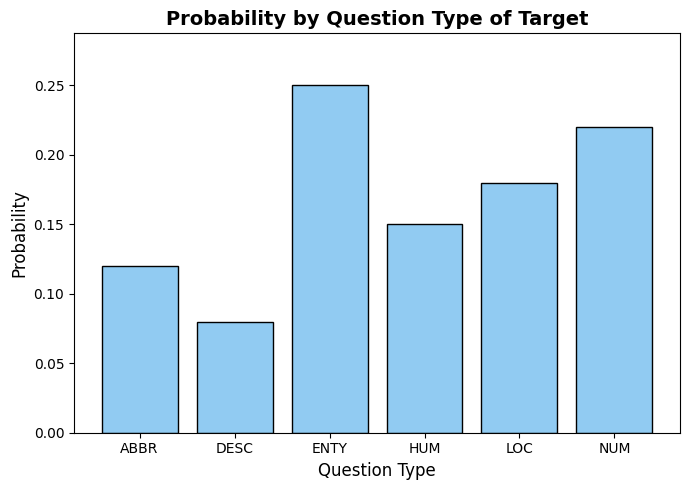

In [28]:
# Graph Config
question_types = ['ABBR', 'DESC', 'ENTY', 'HUM', 'LOC', 'NUM']
probabilities = np.array([0.12, 0.08, 0.25, 0.15, 0.18, 0.22])
print(f"Sum: {probabilities.sum()}")
# Graph
plt.figure(figsize=(7, 5))
bars = plt.bar(question_types, probabilities, color=target_color, edgecolor='black', linewidth=1)
plt.ylabel('Probability', fontsize=12)
plt.xlabel('Question Type', fontsize=12)
plt.title('Probability by Question Type of Target', fontsize=14, fontweight='bold')
plt.ylim(0, max(probabilities) * 1.15)

plt.tight_layout()
plt.savefig('../../figure/qtype_prob_target.png', dpi=300, bbox_inches='tight')
plt.show()

- Loss Graph

In [30]:
def visualize_qa_loss(start_loss, end_loss, title="QA Model Training Loss", save_path=None):
    """
    추출식 QA 모델의 Start/End position loss를 시각화하는 함수
    
    Parameters:
    -----------
    start_loss : np.ndarray
        각 에포크의 start position loss 배열
    end_loss : np.ndarray
        각 에포크의 end position loss 배열
    title : str
        그래프 제목
    save_path : str
        그래프 저장 경로
    """
    
    num_epochs = len(start_loss)
    total_loss = start_loss + end_loss
    
    # 그래프 생성
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    
    # 좌측: 손실 곡선
    axes[0].plot(range(num_epochs), start_loss, 
                label='Start Position Loss', marker='o', markersize=3, linewidth=2, color='#1f77b4')
    axes[0].plot(range(num_epochs), end_loss, 
                label='End Position Loss', marker='s', markersize=3, linewidth=2, color='#ff7f0e')
    axes[0].plot(range(num_epochs), total_loss, 
                label='Total Loss', marker='^', markersize=4, linewidth=2.5, color='red')
    axes[0].set_xlabel('Epoch', fontsize=12, fontweight='bold')
    axes[0].set_ylabel('Cross Entropy Loss', fontsize=12, fontweight='bold')
    axes[0].set_title(f'{title}\n(Start & End Answer Span)', fontsize=13, fontweight='bold')
    axes[0].legend(fontsize=10, loc='upper right')
    axes[0].grid(True, alpha=0.3, linestyle='--')
    
    # 우측: 손실 감소율
    loss_reduction = ((total_loss[0] - total_loss) / total_loss[0]) * 100
    axes[1].fill_between(range(num_epochs), 0, loss_reduction, alpha=0.3, color='green')
    axes[1].plot(range(num_epochs), loss_reduction, 
                color='green', linewidth=2.5, marker='o', markersize=3)
    axes[1].set_xlabel('Epoch', fontsize=12, fontweight='bold')
    axes[1].set_ylabel('Loss Reduction (%)', fontsize=12, fontweight='bold')
    axes[1].set_title('Cumulative Loss Reduction Rate', fontsize=13, fontweight='bold')
    axes[1].grid(True, alpha=0.3, linestyle='--')
    
    plt.tight_layout()
    
    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
        print(f"✓ 그래프가 저장되었습니다: {save_path}")
    
    plt.show()
    
    # 통계 정보 출력
    print("\n=== QA Model Loss Statistics ===")
    print(f"Total Epochs: {num_epochs}")
    print(f"Initial Start Loss: {start_loss[0]:.4f}")
    print(f"Final Start Loss: {start_loss[-1]:.4f}")
    print(f"Initial End Loss: {end_loss[0]:.4f}")
    print(f"Final End Loss: {end_loss[-1]:.4f}")
    print(f"Initial Total Loss: {total_loss[0]:.4f}")
    print(f"Final Total Loss: {total_loss[-1]:.4f}")
    print(f"Loss Reduction Rate: {loss_reduction[-1]:.2f}%")

✓ 그래프가 저장되었습니다: qa_loss_training.png


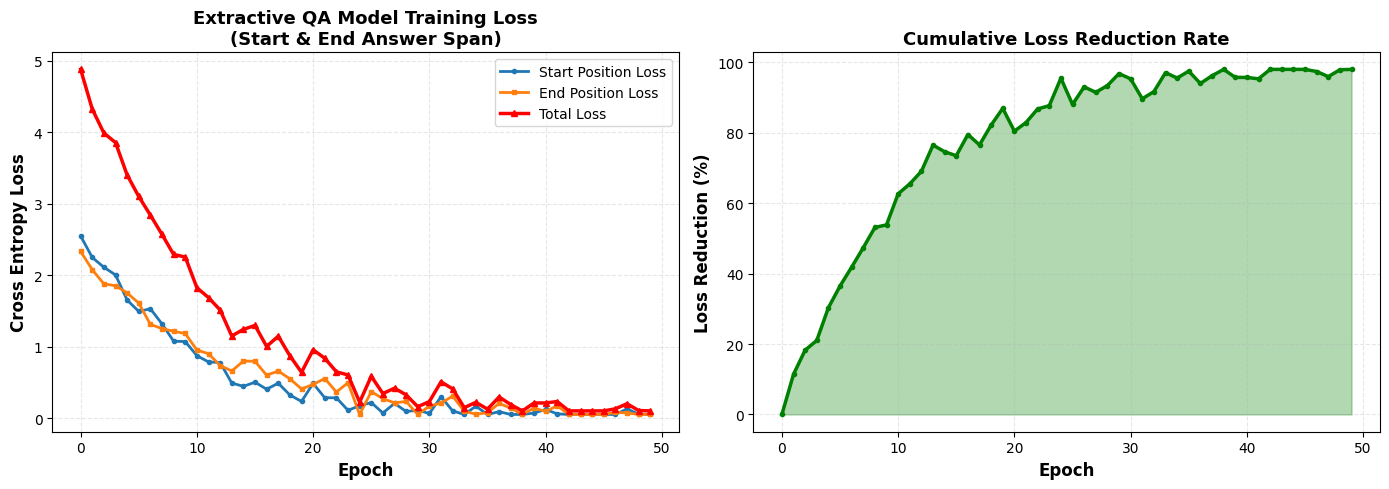


=== QA Model Loss Statistics ===
Total Epochs: 50
Initial Start Loss: 2.5497
Final Start Loss: 0.0500
Initial End Loss: 2.3324
Final End Loss: 0.0500
Initial Total Loss: 4.8821
Final Total Loss: 0.1000
Loss Reduction Rate: 97.95%


In [31]:
if __name__ == "__main__":
    # 예시 데이터 생성
    np.random.seed(42)
    num_epochs = 50
    
    # Start 손실
    start_loss_data = 2.5 * np.exp(-np.arange(num_epochs) / 10) + 0.1 * np.random.randn(num_epochs)
    start_loss_data = np.maximum(start_loss_data, 0.05)
    
    # End 손실
    end_loss_data = 2.3 * np.exp(-np.arange(num_epochs) / 12) + 0.1 * np.random.randn(num_epochs)
    end_loss_data = np.maximum(end_loss_data, 0.05)
    
    # 함수 호출
    visualize_qa_loss(start_loss_data, end_loss_data, 
                     title="Extractive QA Model Training Loss",
                     save_path='qa_loss_training.png')


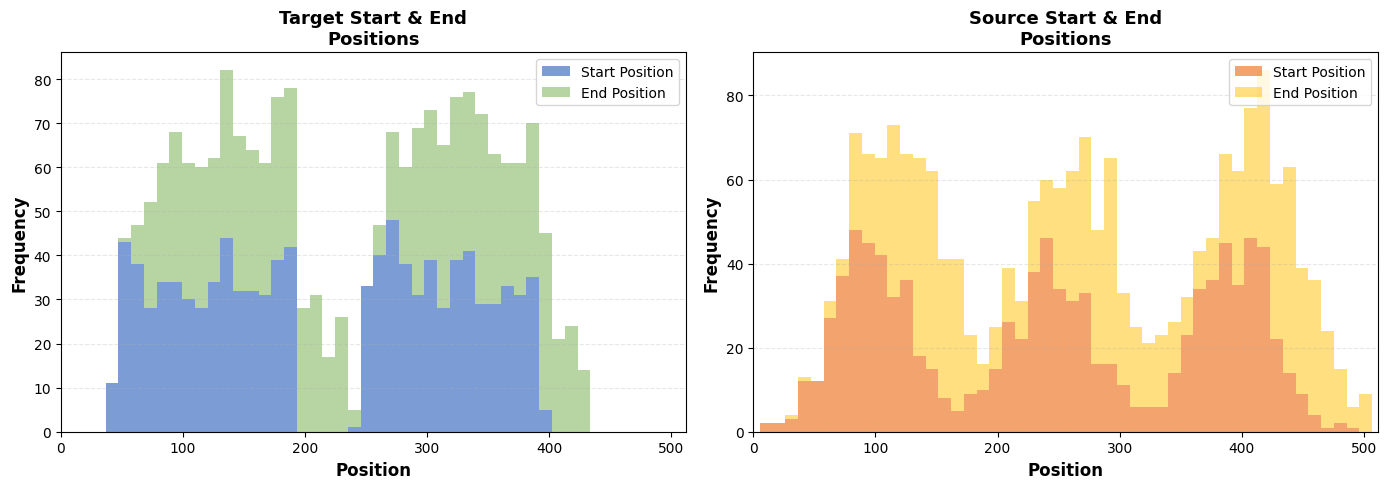


=== Span Positions Statistics ===

TARGET POSITIONS:
  Start - Mean: 223.03, Std: 108.03
  End   - Mean: 252.81, Std: 108.42

SOURCE POSITIONS:
  Start - Mean: 249.92, Std: 126.93
  End   - Mean: 286.60, Std: 127.07


In [32]:
import numpy as np
import matplotlib.pyplot as plt

def visualize_span_positions(target_starts, target_ends, source_starts, source_ends, 
                             max_seq_length=512):
    """
    Target과 Source의 Start & End Positions 분포를 시각화
    
    Parameters:
    -----------
    target_starts : np.ndarray
        Target 문서의 start position 배열
    target_ends : np.ndarray
        Target 문서의 end position 배열
    source_starts : np.ndarray
        Source 문서의 start position 배열
    source_ends : np.ndarray
        Source 문서의 end position 배열
    max_seq_length : int
        최대 시퀀스 길이
    """
    
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    
    # 색상 정의
    target_color = '#4472C4'  # 파란색
    source_color = '#ED7D31'  # 주황색
    
    # 히스토그램 계산
    bins = np.linspace(0, max_seq_length, 50)
    
    # ===== 좌측: Target Positions =====
    target_start_hist, _ = np.histogram(target_starts, bins=bins)
    target_end_hist, _ = np.histogram(target_ends, bins=bins)
    
    x_pos = bins[:-1]
    width = bins[1] - bins[0]
    
    axes[0].bar(x_pos, target_start_hist, width=width, alpha=0.7, 
               label='Start Position', color=target_color)
    axes[0].bar(x_pos, target_end_hist, width=width, alpha=0.5, 
               label='End Position', color='#70AD47', bottom=target_start_hist)
    
    axes[0].set_xlabel('Position', fontsize=12, fontweight='bold')
    axes[0].set_ylabel('Frequency', fontsize=12, fontweight='bold')
    axes[0].set_title('Target Start & End\nPositions', fontsize=13, fontweight='bold')
    axes[0].legend(fontsize=10, loc='upper right')
    axes[0].grid(True, alpha=0.3, axis='y', linestyle='--')
    axes[0].set_xlim(0, max_seq_length)
    
    # ===== 우측: Source Positions =====
    source_start_hist, _ = np.histogram(source_starts, bins=bins)
    source_end_hist, _ = np.histogram(source_ends, bins=bins)
    
    axes[1].bar(x_pos, source_start_hist, width=width, alpha=0.7, 
               label='Start Position', color=source_color)
    axes[1].bar(x_pos, source_end_hist, width=width, alpha=0.5, 
               label='End Position', color='#FFC000', bottom=source_start_hist)
    
    axes[1].set_xlabel('Position', fontsize=12, fontweight='bold')
    axes[1].set_ylabel('Frequency', fontsize=12, fontweight='bold')
    axes[1].set_title('Source Start & End\nPositions', fontsize=13, fontweight='bold')
    axes[1].legend(fontsize=10, loc='upper right')
    axes[1].grid(True, alpha=0.3, axis='y', linestyle='--')
    axes[1].set_xlim(0, max_seq_length)
    
    plt.tight_layout()
    plt.savefig('span_positions_distribution.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    # 통계 정보 출력
    print("\n=== Span Positions Statistics ===\n")
    print("TARGET POSITIONS:")
    print(f"  Start - Mean: {np.mean(target_starts):.2f}, Std: {np.std(target_starts):.2f}")
    print(f"  End   - Mean: {np.mean(target_ends):.2f}, Std: {np.std(target_ends):.2f}")
    
    print("\nSOURCE POSITIONS:")
    print(f"  Start - Mean: {np.mean(source_starts):.2f}, Std: {np.std(source_starts):.2f}")
    print(f"  End   - Mean: {np.mean(source_ends):.2f}, Std: {np.std(source_ends):.2f}")


# ===== 사용 예시 =====
np.random.seed(42)
max_length = 512
num_samples = 1000

# Target: 분산된 분포
target_starts = np.concatenate([
    np.random.uniform(50, 200, num_samples // 2).astype(int),
    np.random.uniform(250, 400, num_samples // 2).astype(int)
])

target_ends = (target_starts + np.random.uniform(10, 50, len(target_starts))).astype(int)
target_ends = np.minimum(target_ends, max_length - 1)

# Source: 집중된 분포
source_starts = np.concatenate([
    np.random.normal(100, 30, num_samples // 3).astype(int),
    np.random.normal(250, 40, num_samples // 3).astype(int),
    np.random.normal(400, 30, num_samples // 3).astype(int)
])

source_starts = np.clip(source_starts, 0, max_length - 1)
source_ends = (source_starts + np.random.uniform(15, 60, len(source_starts))).astype(int)
source_ends = np.minimum(source_ends, max_length - 1)

# 함수 호출
visualize_span_positions(target_starts, target_ends, source_starts, source_ends)


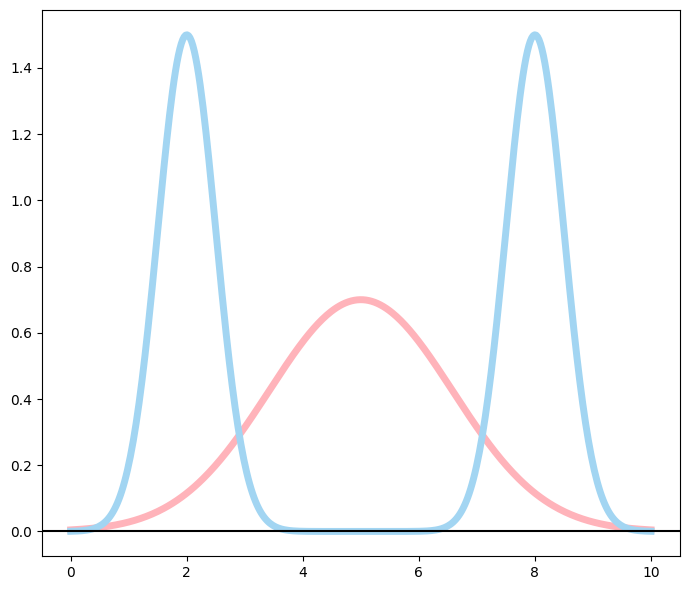

In [57]:
x = np.linspace(0, 10, 400)

# 얕은 종모양 (파스텔 빨강)
y1 = 0.7 * np.exp(-((x-5)**2)/5)

# 양 끝 봉우리, 중앙 오목 (파스텔 파랑)
y2 = 1.5*np.exp(-((x-2)**2)/0.5) + 1.5*np.exp(-((x-8)**2)/0.5)

plt.figure(figsize=(7,6))
plt.plot(x, y1, color='#ffb3ba', linewidth=5, label='Predicted Positions')
plt.plot(x, y2, color='#a2d5f2', linewidth=5, label='GT Positions')
plt.axhline(0, color='black', linewidth=1.5)
# plt.legend(loc='upper right') 
# plt.grid(alpha=0.18)
plt.tight_layout()
plt.show()
